## Data Processing & Modelling

We first install all the necessary libraries required for analysis and update any libraries for best versions. 

In Colab matplotlib version 3.2.2 is installed. We need the latest 3.5.1 for our visualization and so we first install the latest version

In [ ]:
!pip3 install matplotlib --upgrade

     |████████████████████████████████| 11.2 MB 5.1 MB/s 
     |████████████████████████████████| 930 kB 47.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#Load all required general libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
from pandas.api.types import CategoricalDtype
import plotly.graph_objects as go
import plotly.express as px
import datetime
from plotly.subplots import make_subplots
import pandas_profiling
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

from sklearn import preprocessing
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 60)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing libraries
import pandas as pd
import glob
import os
  
# merging the files
joined_files = os.path.join("/content/drive/MyDrive/FinalProject/Datasets/", "*.csv")
  
# A list of all joined files is returned
joined_list = glob.glob(joined_files)
  
# Finally, the files are joined
boston_crime = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
boston_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87789 entries, 0 to 87788
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      87789 non-null  object 
 1   OFFENSE_CODE         87789 non-null  int64  
 2   OFFENSE_CODE_GROUP   0 non-null      float64
 3   OFFENSE_DESCRIPTION  87789 non-null  object 
 4   DISTRICT             86751 non-null  object 
 5   REPORTING_AREA       87789 non-null  object 
 6   SHOOTING             87789 non-null  int64  
 7   OCCURRED_ON_DATE     87789 non-null  object 
 8   YEAR                 87789 non-null  int64  
 9   MONTH                87789 non-null  int64  
 10  DAY_OF_WEEK          87789 non-null  object 
 11  HOUR                 87789 non-null  int64  
 12  UCR_PART             0 non-null      float64
 13  STREET               87110 non-null  object 
 14  Lat                  87789 non-null  float64
 15  Long                 87789 non-null 

## Exploratory Data Analysis

In [ ]:
def check_data(dataframe):
    print("Shape")
    print(dataframe.shape)
    print("Top 3")
    print(dataframe.head(3))
    print("Bottom 3")
    print(dataframe.tail(3))
    print(" Quantiles ")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_data(boston_crime)

Shape
(87789, 17)
Top 3
  INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP                         OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA  SHOOTING OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART         STREET        Lat       Long                                  Location
0       225520077          3126                 NaN  WARRANT ARREST - OUTSIDE OF BOSTON WARRANT      D14            786         0    2/2/2022 0:00  2022      2   Wednesday     0       NaN  WASHINGTON ST  42.343081 -71.141723   (42.34308127134165, -71.14172267328729)
1       222648862          3831                 NaN       M/V - LEAVING SCENE - PROPERTY DAMAGE       B2            288         0   2/5/2022 18:25  2022      2    Saturday    18       NaN  WASHINGTON ST  42.329748 -71.084540  (42.329748204791635, -71.08454011649543)
2       222201764           724                 NaN                                  AUTO THEFT       C6            200         0    1/9/2022 0:00  2022      1      Sunday    

Our data contains 87789 rows and 17 columns. We see that a lot of entries are missing in our dataset. 

We will now visualize this missing data to understand better

## Handling Missing Values

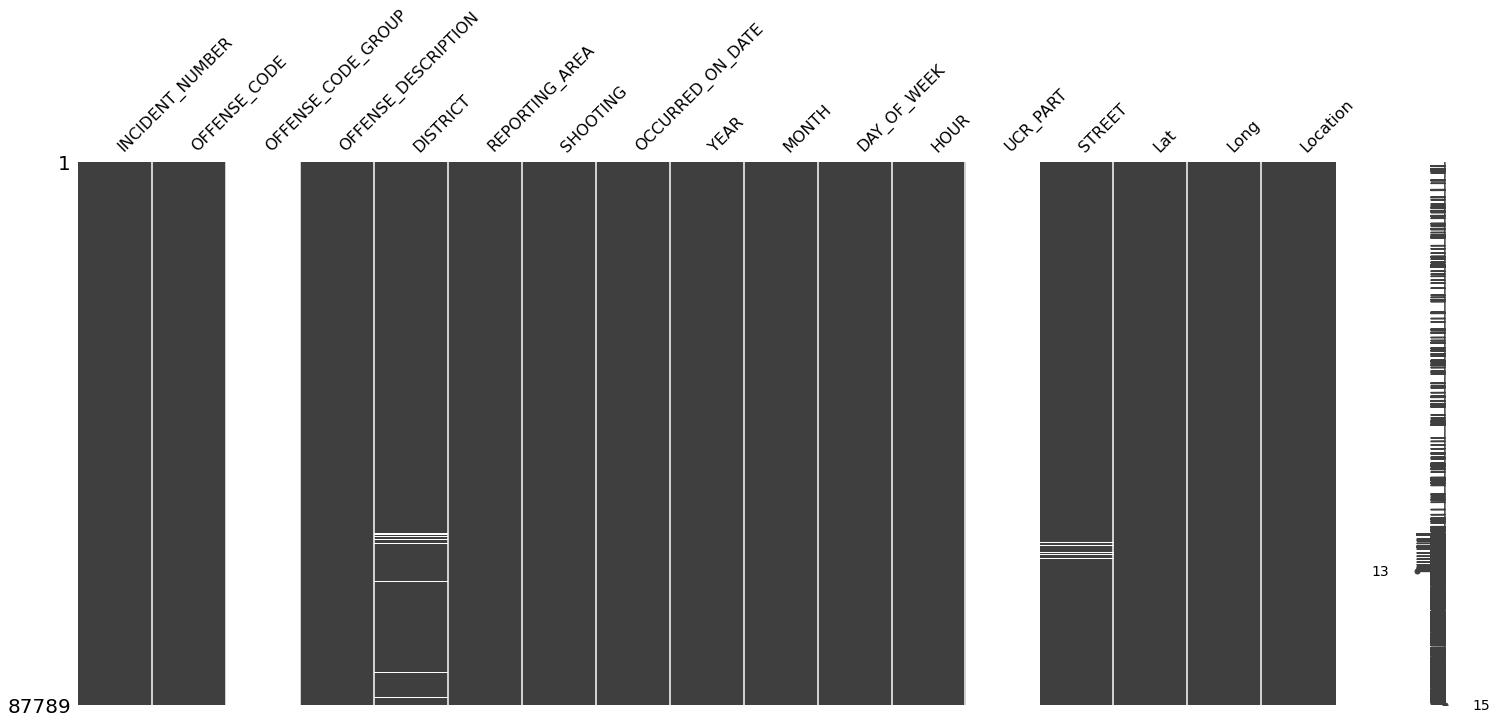

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
msno.matrix(boston_crime)
plt.show()

In [ ]:
percent_missing = boston_crime.isnull().sum() * 100 / len(boston_crime)
Total_missing = boston_crime.isnull().sum()
missing_value_df = pd.DataFrame({'total_missing':Total_missing,'percent_missing': percent_missing})
missing_value_df

total_missing  percent_missing
INCIDENT_NUMBER                  0         0.000000
OFFENSE_CODE                     0         0.000000
OFFENSE_CODE_GROUP           87789       100.000000
OFFENSE_DESCRIPTION              0         0.000000
DISTRICT                      1038         1.182380
REPORTING_AREA                   0         0.000000
SHOOTING                         0         0.000000
OCCURRED_ON_DATE                 0         0.000000
YEAR                             0         0.000000
MONTH                            0         0.000000
DAY_OF_WEEK                      0         0.000000
HOUR                             0         0.000000
UCR_PART                     87789       100.000000
STREET                         679         0.773445
Lat                              0         0.000000
Long                             0         0.000000
Location                         0         0.000000

We see that the columns- OFFENSE_CODE_GROUP, DISTRICT, UCR_PART, STREET has missing values in our dataset. In our analysis we are going to drop UCR_PART & OFFENSE_CODE_GROUP as there are no values in the column in our dataset and we can find other columns that help us achieve our goals. In DISTRICT and STREET, we will replace missing values with the mode of the respective columns. 


In [ ]:
boston_crime = boston_crime.drop(['UCR_PART','OFFENSE_CODE_GROUP'], axis=1)

In [ ]:
#Finding mode of STREET & DISTRICT
for column in ['STREET', 'DISTRICT']:
    boston_crime[column].fillna(boston_crime[column].mode()[0], inplace=True)

In [ ]:
boston_crime.isna().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

We now have no missing values in the dataset

##Data Preparation
Now that we have no missing values in our dataset, we are going to prepare our data by only using columns we think are necessary for our analysis. We also alter some columns to make the best use of the data for advanced analysis

In [ ]:
boston_crime.apply(pd.Series.nunique)

INCIDENT_NUMBER        87789
OFFENSE_CODE             123
OFFENSE_DESCRIPTION      122
DISTRICT                  13
REPORTING_AREA           873
SHOOTING                   2
OCCURRED_ON_DATE       73399
YEAR                       2
MONTH                     12
DAY_OF_WEEK                7
HOUR                      24
STREET                  9015
Lat                    13511
Long                   13524
Location               13547
dtype: int64

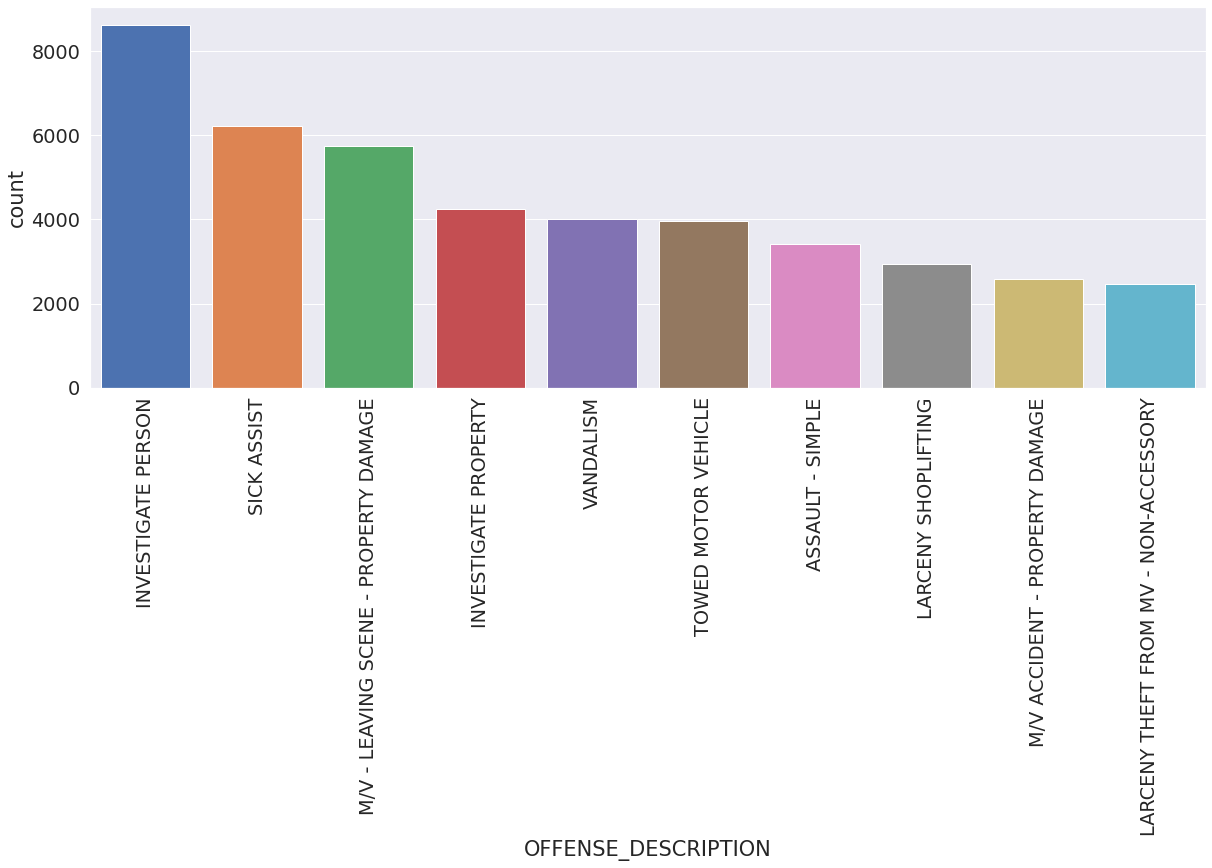

In [ ]:
%matplotlib inline
rcParams["figure.figsize"] = 20,7
sns.set(font_scale=1.75)
order = boston_crime['OFFENSE_DESCRIPTION'].value_counts().head(10).index
sns.countplot(data = boston_crime, x='OFFENSE_DESCRIPTION', order = order,  saturation=2,linewidth=1)
plt.xticks(rotation = 90)
plt.show()

##Most Crimes Occur at time?

Text(0.5, 18.680000000000007, 'HOUR')

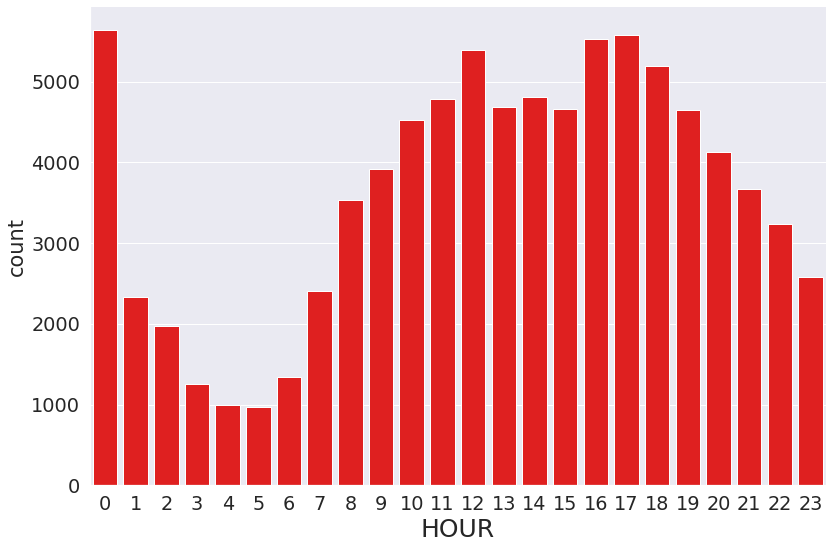

In [ ]:
sns.catplot(x='HOUR',
           kind='count',
            height=8, 
            aspect=1.5,
            color='red',
           data=boston_crime)
plt.xlabel('HOUR',fontsize=25)

## Day of Most crimes

Text(0.5, 18.680000000000007, 'Day')

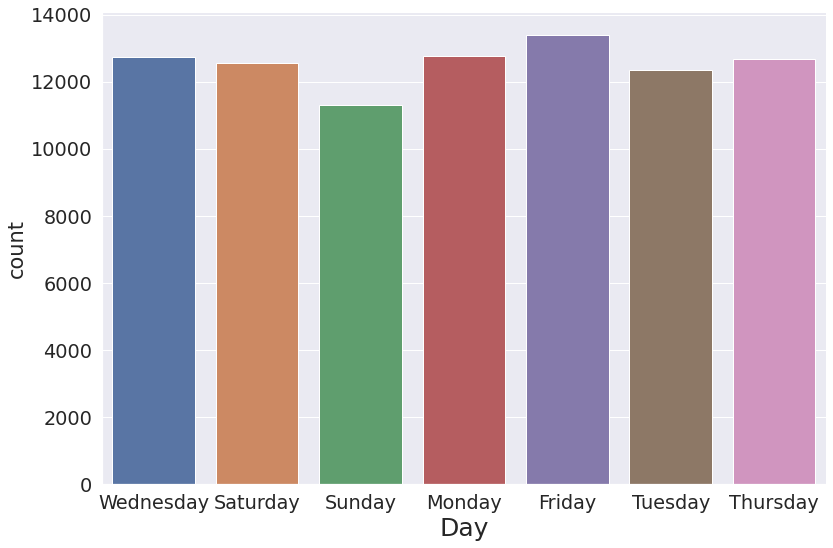

In [ ]:
sns.catplot(x='DAY_OF_WEEK',
            kind='count',
            height=8, 
            aspect=1.5,
            data=boston_crime)
plt.xlabel('Day',fontsize=25)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'INVESTIGATE PERSON'),
  Text(1, 0, 'SICK ASSIST'),
  Text(2, 0, 'M/V - LEAVING SCENE - PROPERTY DAMAGE'),
  Text(3, 0, 'INVESTIGATE PROPERTY'),
  Text(4, 0, 'VANDALISM'),
  Text(5, 0, 'TOWED MOTOR VEHICLE'),
  Text(6, 0, 'ASSAULT - SIMPLE'),
  Text(7, 0, 'LARCENY SHOPLIFTING'),
  Text(8, 0, 'M/V ACCIDENT - PROPERTY DAMAGE'),
  Text(9, 0, 'LARCENY THEFT FROM MV - NON-ACCESSORY'),
  Text(10, 0, 'SICK/INJURED/MEDICAL - PERSON'),
  Text(11, 0, 'PROPERTY - LOST/ MISSING')])

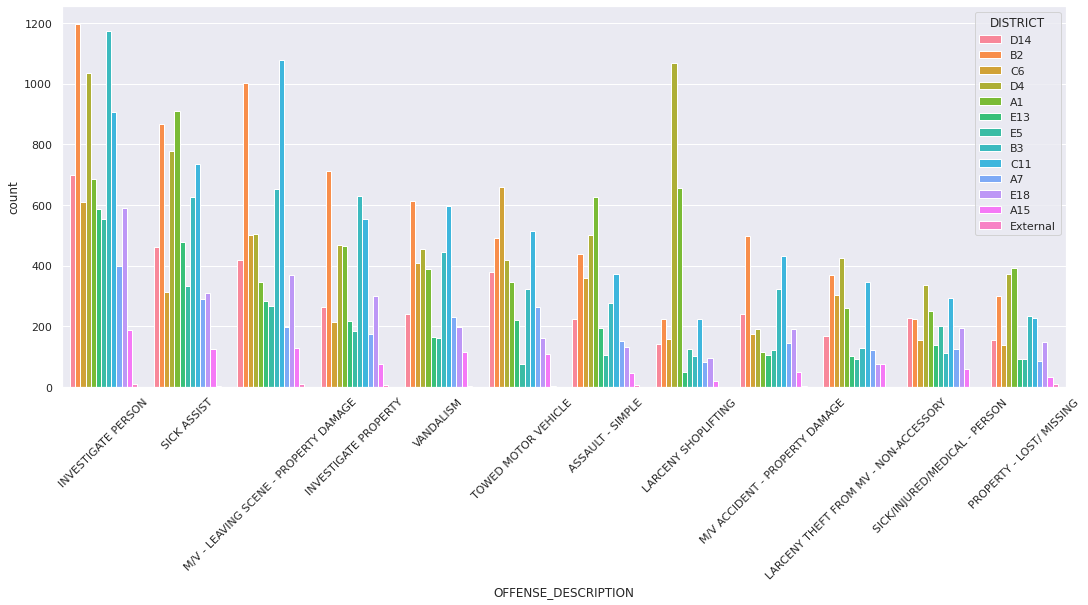

In [ ]:
rcParams["figure.figsize"] = 18,7
sns.set(font_scale=1)
order = boston_crime['OFFENSE_DESCRIPTION'].value_counts().head(12).index
sns.countplot(data = boston_crime, x='OFFENSE_DESCRIPTION',hue='DISTRICT', order = order,  saturation=2,linewidth=1)
plt.xticks(rotation=45)

In [ ]:
boston_crime_model = boston_crime.drop(['SHOOTING','OFFENSE_CODE','OCCURRED_ON_DATE','Location','REPORTING_AREA','INCIDENT_NUMBER','YEAR','DAY_OF_WEEK'], axis=1)

rename = {'OFFENSE_DESCRIPTION':'Description',
          'DISTRICT':'District',
          'STREET':'Street',        
          'MONTH':'Month',          
          'HOUR':'Hour'}

boston_crime_model.rename(index=str, columns=rename, inplace=True)

boston_crime_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87789 entries, 0 to 87788
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  87789 non-null  object 
 1   District     87789 non-null  object 
 2   Month        87789 non-null  int64  
 3   Hour         87789 non-null  int64  
 4   Street       87789 non-null  object 
 5   Lat          87789 non-null  float64
 6   Long         87789 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.4+ MB


In our data, we use the Column Description as the dependent variable. So we convert all the necessary columns from a categorical datatype to numerical

In [ ]:
col1 = pd.Categorical(boston_crime_model["Description"])
boston_crime_model['Description']=col1.codes
col2 = pd.Categorical(boston_crime_model["District"])
boston_crime_model['District']=col2.codes
col3 = pd.Categorical(boston_crime_model['Street'])
boston_crime_model['Street']=col3.codes
boston_crime_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87789 entries, 0 to 87788
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  87789 non-null  int8   
 1   District     87789 non-null  int8   
 2   Month        87789 non-null  int64  
 3   Hour         87789 non-null  int64  
 4   Street       87789 non-null  int16  
 5   Lat          87789 non-null  float64
 6   Long         87789 non-null  float64
dtypes: float64(2), int16(1), int64(2), int8(2)
memory usage: 3.7+ MB


## Data Modelling



<AxesSubplot:>

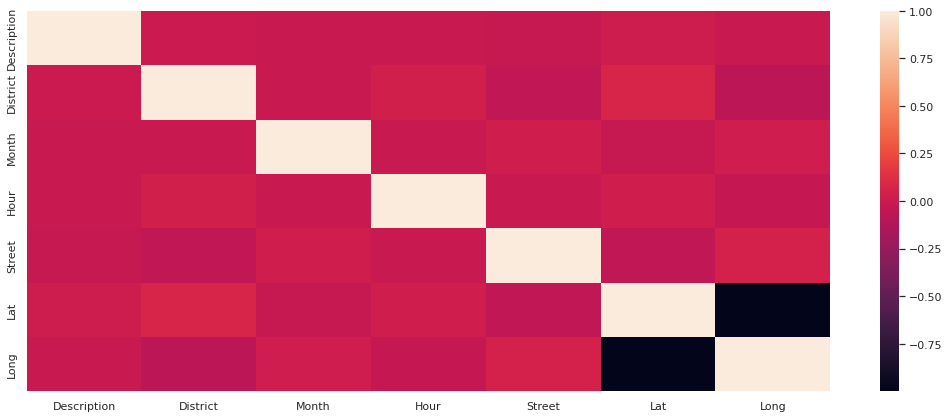

In [ ]:
cm=boston_crime_model.corr()
sns.heatmap(cm)

In [ ]:
x=boston_crime_model.drop(columns =["Description"],axis=1)
y=boston_crime_model["Description"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3,random_state=0)


In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)##calculate mean/std deviation from training data
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [ ]:
#step 2: get the PCA model

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Now we can transform this data to its first 2 principal components.

pca.fit(x_train_scaled)##finding the new axis from training data

x_train_scaled_pca=pca.transform(x_train_scaled)##using new axis to represent data

x_test_scaled_pca=pca.transform(x_test_scaled)


##see how much variance is explained

pca.explained_variance_ratio_

array([0.33679594, 0.17681859])

PC1 explains 33.7% Variation in the data and PC2 explains 17.7% variation in data

In [ ]:
len(pca.components_[1])

###eigen values

eigenvalues = pca.explained_variance_

###loadings

import numpy as np

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

print(eigenvalues)

print(loadings)

[2.02080855 1.0609288 ]
[[-0.15739377  0.6058385 ]
 [ 0.04236814 -0.32123002]
 [-0.0582446   0.48032007]
 [ 0.11618624 -0.58208773]
 [-0.99419855 -0.10380103]
 [ 0.9944437   0.10193933]]


PC 1 explains 2.02/3.08 of variance in the data and P2 explains 1.06/3.08 variance in the data


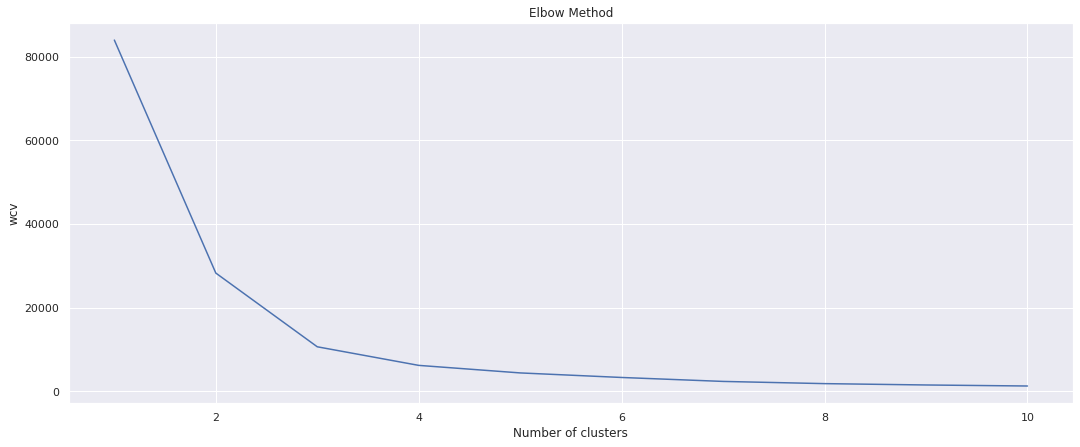

In [ ]:
from sklearn.cluster import KMeans
wcv = []#created empty list

for i in range(1,11):
    km=KMeans(n_clusters=i)#initialize the model
    km.fit(x_test_scaled_pca) #fitting the model
    wcv.append(km.inertia_) 
plt.plot(range(1,11),wcv)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcv')
plt.show()

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

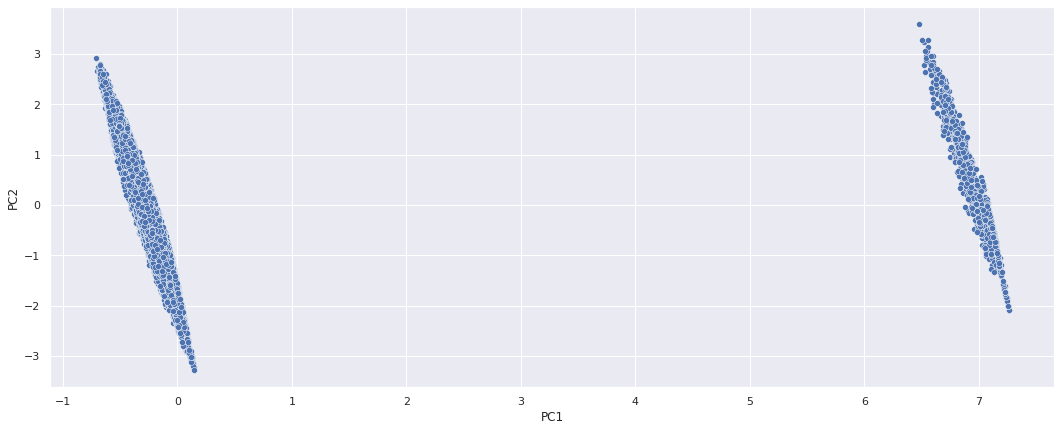

In [ ]:
#convert PC1 and PC2 into a table

x_test_scaled_pca=pd.DataFrame(x_test_scaled_pca,columns=["PC1","PC2"])

import seaborn as sns
sns.scatterplot(x="PC1",y="PC2",data=x_test_scaled_pca,palette="Set1")

From the above analysis we see that using k=2 will give us the best model

##Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#initialize the model
model = LogisticRegression(solver="liblinear")
#fitting the model (or training it) 
model.fit(x_train, y_train)
train_prediction = model.predict(x_train)


In [ ]:
#Confusion Matrix

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00       549
           6       0.00      0.00      0.00       981
           7       0.00      0.00      0.00       386
           8       0.00      0.00      0.00        26
           9       0.00      0.00      0.00        91
          10       0.00      0.00      0.00       115
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00       110
          15   

## GeoSpatial Analysis

In [ ]:
crime_22= boston_crime[boston_crime['YEAR'] == 2022]
crime_22

INCIDENT_NUMBER  OFFENSE_CODE                          OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA  SHOOTING OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR                                             STREET        Lat       Long                                  Location
0           225520077          3126   WARRANT ARREST - OUTSIDE OF BOSTON WARRANT      D14            786         0    2/2/2022 0:00  2022      2   Wednesday     0                                      WASHINGTON ST  42.343081 -71.141723   (42.34308127134165, -71.14172267328729)
1           222648862          3831        M/V - LEAVING SCENE - PROPERTY DAMAGE       B2            288         0   2/5/2022 18:25  2022      2    Saturday    18                                      WASHINGTON ST  42.329748 -71.084540  (42.329748204791635, -71.08454011649543)
2           222201764           724                                   AUTO THEFT       C6            200         0    1/9/2022 0:00  2022      1      Sunday     0                                         W BROADWAY  42.341287 -71.054679  (42.341287504390436, -71.05467932649397)
3           222201559           301                                      ROBBERY       D4                        0   3/5/2022 13:00  2022      3    Saturday    13                                          ALBANY ST  42.333184 -71.073939  (42.333184490911954, -71.07393881002383)
4           222111641           619                           LARCENY ALL OTHERS      D14            778         0  2/14/2022 12:30  2022      2      Monday    12                                      WASHINGTON ST  42.349056 -71.150498   (42.34905600030506, -71.15049849975023)
...               ...           ...                                          ...      ...            ...       ...              ...   ...    ...         ...   ...                                                ...        ...        ...                                       ...
16063       222021031          1402                                    VANDALISM      A15                        0   3/26/2022 3:01  2022      3    Saturday     3                                            POLK ST  42.379127 -71.061227   (42.37912705793007, -71.06122663310994)
16064       149210376          3126   WARRANT ARREST - OUTSIDE OF BOSTON WARRANT       B2                        0    1/2/2022 0:00  2022      1      Sunday     0  WASHINGTON ST & ROXBURY ST\nBOSTON  MA 02119\n...  42.329600 -71.084620   (42.32959998129787, -71.08462000476281)
16065       122207734          3831        M/V - LEAVING SCENE - PROPERTY DAMAGE       B3            465         0   2/1/2022 18:00  2022      2     Tuesday    18                                   BLUE HILL AVENUE   0.000000   0.000000                                    (0, 0)
16066       122201046          2101  OPERATING UNDER THE INFLUENCE (OUI) ALCOHOL       B2                        0  2/12/2022 21:54  2022      2    Saturday    21                                   BLUE HILL AVENUE   0.000000   0.000000                                    (0, 0)
16067       122004001          3115                           INVESTIGATE PERSON      E13            912         0   1/19/2022 9:30  2022      1   Wednesday     9                                           HEATH ST  42.325131 -71.099408   (42.32513050637361, -71.09940814578592)

[16068 rows x 15 columns]

In [ ]:
m = folium.Map(location=[42.361145, -71.057083], zoom_start=13)
#Add points to the map
cluster = MarkerCluster()
for idx, row in crime_22.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        cluster.add_child(Marker([row['Lat'], row['Long']]))
m.add_child(cluster)